In [2]:
from ramlab.molecules.CH4 import CH4
import matplotlib.pyplot as plt
import wedme.apply.dev
import numpy as np
from ramlab.simulate.simulation import simulate

M = CH4()

# Select the 5000 most intense transitions
transitions = M.get_all_transitions()
transitions = transitions.sortby("crosssection", ascending=False)[:5000] 

# Calculate the intensity of the transitions for T=860 K
I_stick = M.get_intensity(transitions, T=860)
dnu_stick = transitions.vacuum_wavenumber

# Simulate the spectrum with Gaussian and Lorentzian broadening
dnu_sim = np.linspace(dnu_stick.min(), dnu_stick.max(), 500)
I_sim = simulate(dnu_sim, dnu_stick, I_stick, 1, 0, N_bin=10)

Loading csv file: 509000rows [00:02, 171489.32rows/s]


Rejected 2 lines with a length not equal to 160.


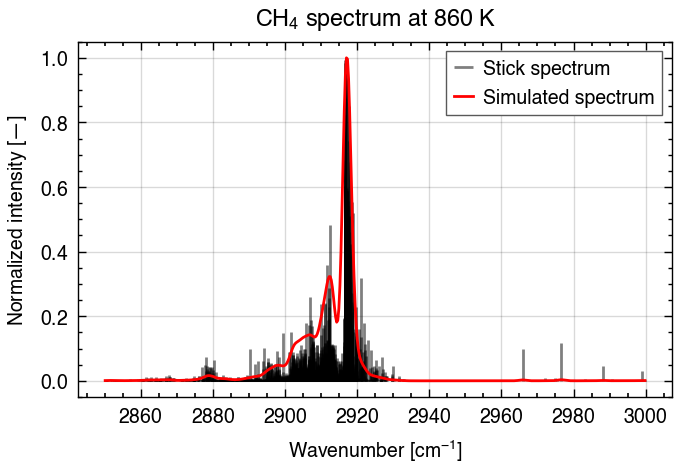

In [3]:
# Plot the results
plt.figure()
plt.vlines(dnu_stick, 0, I_stick / np.nanmax(I_stick), color="k", alpha=0.5, label="Stick spectrum")
plt.plot(dnu_sim, I_sim / np.nanmax(I_sim), color="r", label="Simulated spectrum")
plt.legend()
plt.xlabel(r"Wavenumber [$\mathrm{cm^{-1}}$]")
plt.ylabel(r"Normalized intensity [$\mathrm{\emdash}$]")
plt.title(r"$\mathregular{CH_4}$ spectrum at 860 K")
plt.show()